<a href="https://colab.research.google.com/github/kowalski-k/projekt_TOM/blob/master/nauka_kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importowanie bibliotek
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
print(tf.__version__)

2.2.0


In [2]:
#pobieranie danych
! curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
! sudo apt-get install git-lfs
! git lfs install
! git clone https://github.com/neheller/kits19.git 
%cd kits19
! python -m starter_code.get_imaging
!git checkout feature/google-colab
!make

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 6,877 kB of archives.
After this operation, 16.4 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 2.11.0 [6,877 kB]
Fetched 6,877 kB in 1s (7,668 kB/s)
debconf: unable to ini

In [3]:
NUMBER_OF_CASES_TRAINING = 100
NUMBER_OF_CASES_TEST = 10
NUMBER_OF_CASES_VALIDATION = 10

In [4]:
#przeliczenie wybranych wartości na konkretne id case'ów
start_training = 0
stop_training = NUMBER_OF_CASES_TRAINING

start_validation = stop_training
stop_validation = NUMBER_OF_CASES_TRAINING + NUMBER_OF_CASES_VALIDATION

start_test = stop_validation
stop_test = start_test + NUMBER_OF_CASES_TEST

print("Przedziały poszczególnych zbiorów:")
print("Trening: [",start_training,",",stop_training,")")
print("Walidacja: [",start_validation,",",stop_validation,")")
print("Test: [",start_test,",",stop_test,")")

Przedziały poszczególnych zbiorów:
Trening: [ 0 , 100 )
Walidacja: [ 100 , 110 )
Test: [ 110 , 120 )


In [82]:
!rm -rf /content/training
!rm -rf /content/validation
!rm -rf /content/test

In [5]:
####tworzenie ścieżek dla treningu,walidacji oraz testu

###nowy folder dla training data
os.mkdir('/content/training')
##foldery dla: 1)masek nowotworów i nerek  2)volume
os.mkdir('/content/training/volume')
os.mkdir('/content/training/kidney')
os.mkdir('/content/training/tumor')
#folder dla każdego id w każdym podfolderze
for id in range(start_training,stop_training,1):
  os.mkdir('/content/training/volume/{:05d}'.format(id))
  os.mkdir('/content/training/kidney/{:05d}'.format(id))
  os.mkdir('/content/training/tumor/{:05d}'.format(id))

###nowy folder dla validation data
os.mkdir('/content/validation')
##foldery dla: 1)masek nowotworów i nerek  2)volume
os.mkdir('/content/validation/volume')
os.mkdir('/content/validation/kidney')
os.mkdir('/content/validation/tumor')
#folder dla każdego id w każdym podfolderze
for id in range(start_validation,stop_validation,1):
  os.mkdir('/content/validation/volume/{:05d}'.format(id))
  os.mkdir('/content/validation/kidney/{:05d}'.format(id))
  os.mkdir('/content/validation/tumor/{:05d}'.format(id))

###nowy folder dla test data
os.mkdir('/content/test')
##foldery dla: 1)masek nowotworów i nerek  2)volume
os.mkdir('/content/test/volume')
os.mkdir('/content/test/kidney')
os.mkdir('/content/test/tumor')
#folder dla każdego id w każdym podfolderze
for id in range(start_test,stop_test,1):
  os.mkdir('/content/test/volume/{:05d}'.format(id))
  os.mkdir('/content/test/kidney/{:05d}'.format(id))
  os.mkdir('/content/test/tumor/{:05d}'.format(id))

In [ ]:
#wczytanie obrazów do treningu do odpowiednich ścieżek
from starter_code.utils import load_case
import time 

#zmienna do przechowywania liczby obrazów (potrzebna do steps_per_epoch)
number_of_training_pictures = 0

#start czas
start=time.time()

for id in range(start_training,stop_training,1):
  #załadowanie danych i przypisanie zbiorów przekrojów do zmiennych
  volume, segmentation = load_case(id)
  segmentation = segmentation.get_fdata()
  volume = volume.get_fdata()
  (a,y,x) = segmentation.shape
  #aktualizacja liczby obrazów
  number_of_training_pictures = number_of_training_pictures + a
  #konwertowanie na format png i zapis w odpowiednich folderach
  for indeks in range(0,a,1):
    #tworzenie masek nowotworu i guza
    kidney = (segmentation[indeks]==1).astype(np.int8)
    tumor = (segmentation[indeks]==2).astype(np.int8)

    #tworzenie miejsca do przypisania obrazu
    path_tumor = Path('/content/training/tumor/{:05d}'.format(id)) 
    picture_tumor = path_tumor/'{:05d}.png'.format(indeks)

    path_volume = Path('/content/training/volume/{:05d}'.format(id)) 
    picture_volume = path_volume/'{:05d}.png'.format(indeks)

    path_kidney = Path('/content/training/kidney/{:05d}'.format(id))
    picture_kidney = path_kidney/'{:05d}.png'.format(indeks) 

    #zapis
    plt.imsave(fname=str(picture_tumor), arr=tumor, format='png', cmap='gray')
    plt.imsave(fname=str(picture_volume), arr=volume[indeks], format='png', cmap='gray')
    plt.imsave(fname=str(picture_kidney), arr=kidney, format='png', cmap='gray')

#stop czas
stop = time.time()
print("Czas ładowania: ", (int) (stop-start), " sekund")
print("Liczba obrazów do treningu: ", number_of_training_pictures)

In [ ]:
#wczytanie obrazów do walidacji do odpowiednich ścieżek
from starter_code.utils import load_case
import time

#zmienna do przechowywania liczby obrazów (potrzebna do steps_per_epoch)
number_of_validation_pictures = 0

#start czas
start=time.time()

for id in range(start_validation,stop_validation,1):
  #załadowanie danych i przypisanie zbiorów przekrojów do zmiennych
  volume, segmentation = load_case(id)
  segmentation = segmentation.get_fdata()
  volume = volume.get_fdata()
  (a,y,x) = segmentation.shape
  number_of_validation_pictures = number_of_validation_pictures + a
  #konwertowanie na format png i zapis w odpowiednich folderach
  for indeks in range(0,a,1):
    #tworzenie masek nowotworu i guza
    kidney = (segmentation[indeks]==1).astype(np.int8)
    tumor = (segmentation[indeks]==2).astype(np.int8)

    #tworzenie miejsca do przypisania obrazu
    path_tumor = Path('/content/validation/tumor/{:05d}'.format(id)) 
    picture_tumor = path_tumor/'{:05d}.png'.format(indeks)

    path_volume = Path('/content/validation/volume/{:05d}'.format(id)) 
    picture_volume = path_volume/'{:05d}.png'.format(indeks)

    path_kidney = Path('/content/validation/kidney/{:05d}'.format(id))
    picture_kidney = path_kidney/'{:05d}.png'.format(indeks) 

    #zapis
    plt.imsave(fname=str(picture_tumor), arr=tumor, format='png', cmap='gray')
    plt.imsave(fname=str(picture_volume), arr=volume[indeks], format='png', cmap='gray')
    plt.imsave(fname=str(picture_kidney), arr=kidney, format='png', cmap='gray')

#stop czas
stop = time.time()
print("Czas ładowania: ", (int) (stop-start), " sekund")
print("Liczba obrazów do walidacji: ", number_of_validation_pictures)

Czas ładowania:  604  sekund
Liczba obrazów do walidacji:  2543


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
#wczytanie obrazów do testowania do odpowiednich ścieżek
from starter_code.utils import load_volume
from starter_code.utils import load_case
import time 

#start czas
start=time.time()

#ilość obrazów do nauki
number_of_test_pictures = 0

for id in range(start_test,stop_test,1):
  #załadowanie danych i przypisanie zbiorów przekrojów do zmiennych
  volume, segmentation = load_case(id)
  segmentation = segmentation.get_fdata()
  volume = volume.get_fdata()
  (a,y,x) = segmentation.shape
  number_of_test_pictures = number_of_test_pictures + a
  #konwertowanie na format png i zapis w odpowiednich folderach
  for indeks in range(0,a,1):
    #tworzenie masek nowotworu i guza
    kidney = (segmentation[indeks]==1).astype(np.int8)
    tumor = (segmentation[indeks]==2).astype(np.int8)

    #tworzenie miejsca do przypisania obrazu
    path_tumor = Path('/content/test/tumor/{:05d}'.format(id)) 
    picture_tumor = path_tumor/'{:05d}.png'.format(indeks)

    path_volume = Path('/content/test/volume/{:05d}'.format(id)) 
    picture_volume = path_volume/'{:05d}.png'.format(indeks)

    path_kidney = Path('/content/test/kidney/{:05d}'.format(id))
    picture_kidney = path_kidney/'{:05d}.png'.format(indeks) 

    #zapis
    plt.imsave(fname=str(picture_tumor), arr=tumor, format='png', cmap='gray')
    plt.imsave(fname=str(picture_volume), arr=volume[indeks], format='png', cmap='gray')
    plt.imsave(fname=str(picture_kidney), arr=kidney, format='png', cmap='gray')

#stop czas
stop = time.time()
print("Czas ładowania: ", (int) (stop-start), " sekund")
print("Liczba obrazów do testu: ", number_of_test_pictures)

Czas ładowania:  526  sekund
Liczba obrazów do testu:  2271


In [7]:
#definicja rozmiaru obrazów używanych w architekturze (zamieniamy 512 na 256, aby zwolnić nieco RAMu)
image_width = 256
image_height = 256
tuple_sizes = (image_height,image_width)

In [8]:
#Image Data Generator (wykorzystujemy kod z oficjalnej strony tensorflow)
#do pliku: .npy za dużo pamieci zajmowało, zdecydowaliśmy sie na png bo o wiele mniej i dodatkowo daje możliwości

from keras.preprocessing.image import ImageDataGenerator

##normalizacja [0,1], dtype=float16 bo najlepszy dla TPU, którego bedziemy uzywac
#seed i batch
seed = 1
batch_size = 128


############## VOLUME
#training 
print("Volume:")

#training 
volume_datagen_training = ImageDataGenerator(rescale=1./255)

volume_generator_training = volume_datagen_training.flow_from_directory(
    directory='/content/training',
    classes=['volume'],
    target_size=tuple_sizes,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode=None,
    seed=seed)

#validation
volume_datagen_validation = ImageDataGenerator(rescale=1./255)

volume_generator_validation = volume_datagen_validation.flow_from_directory(
    directory='/content/validation',
    classes=['volume'],
    target_size=tuple_sizes,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode=None,
    seed=seed)

#test
volume_datagen_test = ImageDataGenerator(rescale=1./255)

volume_generator_test = volume_datagen_test.flow_from_directory(
    directory='/content/test',
    classes=['volume'],
    target_size=tuple_sizes,
    color_mode='grayscale',
    batch_size=1,
    class_mode=None,
    seed=None,
    shuffle=False)


############## KIDNEY

print("Kidney:")

#training 
kidney_datagen_training = ImageDataGenerator(rescale=1./255)

kidney_generator_training = kidney_datagen_training.flow_from_directory(
    directory='/content/training',
    classes=['kidney'],
    target_size=tuple_sizes,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode=None,
    seed=seed)

#validation
kidney_datagen_validation = ImageDataGenerator(rescale=1./255)
kidney_generator_validation = kidney_datagen_validation.flow_from_directory(
    directory='/content/validation',
    classes=['kidney'],
    target_size=tuple_sizes,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode=None,
    seed=seed)

#test
kidney_datagen_test = ImageDataGenerator(rescale=1./255)

kidney_generator_test = kidney_datagen_test.flow_from_directory(
    directory='/content/test',
    classes=['kidney'],
    target_size=tuple_sizes,
    color_mode='grayscale',
    batch_size=1,
    class_mode=None,
    seed=None,
    shuffle=False)


############## TUMOR

print("Tumor:")

#training
tumor_datagen_training = ImageDataGenerator(rescale=1./255)

tumor_generator_training = tumor_datagen_training.flow_from_directory(
    directory='/content/training',
    classes=['tumor'],
    target_size=tuple_sizes,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode=None,
    seed=seed)

#validation
tumor_datagen_validation = ImageDataGenerator(rescale=1./255)

tumor_generator_validation = tumor_datagen_validation.flow_from_directory(
    directory='/content/validation',
    classes=['tumor'],
    target_size=tuple_sizes,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode=None,
    seed=seed)

#test 
tumor_datagen_test = ImageDataGenerator(rescale=1./255)

tumor_generator_test = tumor_datagen_test.flow_from_directory(
    directory='/content/test',
    classes=['tumor'],
    target_size=tuple_sizes,
    color_mode='grayscale',
    batch_size=1,
    class_mode=None,
    seed=None,
    shuffle=False)


Using TensorFlow backend.


Volume:
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 2271 images belonging to 1 classes.
Kidney:
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 2271 images belonging to 1 classes.
Tumor:
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 2271 images belonging to 1 classes.


In [47]:

#połączenie generatorów do treningu 
kidney_training = zip(volume_generator_training,kidney_generator_training)
tumor_training = zip(volume_generator_training,tumor_generator_training)

#połączenie generatorów do walidacji
kidney_validation = zip(volume_generator_validation,kidney_generator_validation)
tumor_validation = zip(volume_generator_validation,tumor_generator_validation)
'''
#połączenie generatorów do testu
kidney_test = zip(volume_generator_test,kidney_generator_test)
tumor_test = zip(volume_generator_test,tumor_generator_test)
'''

'\n#połączenie generatorów do testu\nkidney_test = zip(volume_generator_test,kidney_generator_test)\ntumor_test = zip(volume_generator_test,tumor_generator_test)\n'

In [9]:
###architektura sieci

#obraz wejsciowy 
image_width = image_width
image_height = image_height
image_channels = 1 
inputs = tf.keras.layers.Input((image_width,image_height,image_channels))

##warstwy skurcz
#1
convolution1 = tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(inputs)
convolution1 = tf.keras.layers.Dropout(0.1)(convolution1)
convolution1 = tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(convolution1)
max_pooling1 = tf.keras.layers.MaxPooling2D((2,2))(convolution1)
#2
convolution2 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(max_pooling1)
convolution2 = tf.keras.layers.Dropout(0.1)(convolution2)
convolution2 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(convolution2)
max_pooling2 = tf.keras.layers.MaxPooling2D((2,2))(convolution2)
#3
convolution3 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(max_pooling2)
convolution3 = tf.keras.layers.Dropout(0.1)(convolution3)
convolution3 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(convolution3)
max_pooling3 = tf.keras.layers.MaxPooling2D((2,2))(convolution3)
#4
convolution4 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(max_pooling3)
convolution4 = tf.keras.layers.Dropout(0.1)(convolution4)
convolution4 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(convolution4)
max_pooling4 = tf.keras.layers.MaxPooling2D((2,2))(convolution4)
#5 - ostatnia (bez MaxPooling)
convolution5 = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(max_pooling4)
convolution5 = tf.keras.layers.Dropout(0.1)(convolution5)
convolution5 = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(convolution5)

##warstwy ekspansja
#6 
up_convolution6 = tf.keras.layers.Conv2DTranspose(128, (3,3), strides=(2,2), padding='same')(convolution5)
up_convolution6 = tf.keras.layers.concatenate([up_convolution6, convolution4])
convolution6 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(up_convolution6)
convolution6 = tf.keras.layers.Dropout(0.1)(convolution6)
convolution6 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(convolution6)
#7
up_convolution7 = tf.keras.layers.Conv2DTranspose(64, (3,3), strides=(2,2), padding='same')(convolution6)
up_convolution7 = tf.keras.layers.concatenate([up_convolution7, convolution3])
convolution7 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(up_convolution7)
convolution7 = tf.keras.layers.Dropout(0.1)(convolution7)
convolution7 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(convolution7)
#8
up_convolution8 = tf.keras.layers.Conv2DTranspose(32, (3,3), strides=(2,2), padding='same')(convolution7)
up_convolution8 = tf.keras.layers.concatenate([up_convolution8, convolution2])
convolution8 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(up_convolution8)
convolution8 = tf.keras.layers.Dropout(0.1)(convolution8)
convolution8 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(convolution8)
#9
up_convolution9 = tf.keras.layers.Conv2DTranspose(16, (3,3), strides=(2,2), padding='same')(convolution8)
up_convolution9 = tf.keras.layers.concatenate([up_convolution9, convolution1], axis=3)
convolution9 = tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(up_convolution9)
convolution9 = tf.keras.layers.Dropout(0.1)(convolution9)
convolution9 = tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(convolution9)

outputs = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(convolution9)

In [10]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
##callbacks
filepath="/content/gdrive/My Drive/U-net/epochs:{epoch:03d}-val_loss:{val_loss:.3f}.hdf5"
callbacks = [
             tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
             tf.keras.callbacks.ModelCheckpoint(filepath, verbose=1, save_best_only=True)
             ]

In [ ]:
number_of_training_pictures = 21718
number_of_validation_pictures = 2543

In [ ]:
#uczenie modelu nerki z użyciem zdefiniowanych generatorów
'''
result_kidney = model.fit_generator(
    kidney_training,
    steps_per_epoch=(number_of_training_pictures//batch_size), 
    epochs=2, 
    validation_data=kidney_validation,
    validation_steps=(number_of_validation_pictures//batch_size),
    verbose=1,
    callbacks=callbacks
    )
'''

'\nresult_kidney = model.fit_generator(\n    kidney_training,\n    steps_per_epoch=(number_of_training_pictures//batch_size), \n    epochs=2, \n    validation_data=kidney_validation,\n    validation_steps=(number_of_validation_pictures//batch_size),\n    verbose=1,\n    callbacks=callbacks\n    )\n'

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [12]:
model.load_weights('/content/gdrive/My Drive/colab_model/epochs_003-val_loss_0.016.hdf5')

In [ ]:
result_kidney = model.fit_generator(
    kidney_training,
    steps_per_epoch=(number_of_training_pictures//batch_size), 
    initial_epoch = 2,
    epochs=3, 
    validation_data=kidney_validation,
    validation_steps=(number_of_validation_pictures//batch_size),
    verbose=1,
    callbacks=callbacks
    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 3/3
169/169 [==============================] - ETA: 0s - loss: 0.0327 - accuracy: 0.9935  
Epoch 00003: val_loss improved from inf to 0.01610, saving model to /content/gdrive/My Drive/U-net/epochs:003-val_loss:0.016.hdf5
169/169 [==============================] - 16176s 96s/step - loss: 0.0327 - accuracy: 0.9935 - val_loss: 0.0161 - val_accuracy: 0.9950


# predict


In [13]:
predict = model.predict_generator(volume_generator_test)#, steps = 34)

Instructions for updating:
Please use Model.predict, which supports generators.


In [14]:
print(predict.shape)
print(np.max(predict))
print(np.mean(predict))
print(np.average(predict))

(2271, 256, 256, 1)
0.84608185
0.016459592
0.016459592


In [76]:
prob_masks = []
real_masks = []

"\n\n  plt.figure()\n  plt.subplot(1,3,1)\n  plt.imshow(prob_mask,cmap='gray')\n  plt.axis('off')\n  plt.title('Dopasowana maska')\n  plt.subplot(1,3,2)\n  plt.imshow(real_mask,cmap='gray')\n  plt.title('Prawidłowa maska')\n  plt.axis('off')\n  plt.subplot(1,3,3)\n  plt.imshow(CT,cmap='gray')\n  plt.title('CT')\n  plt.axis('off')\n"

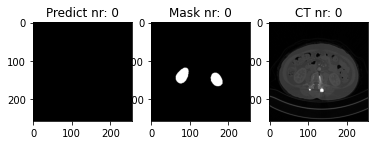

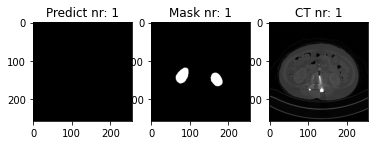

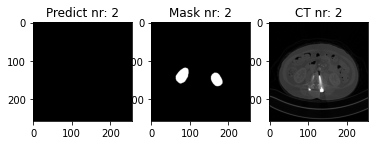

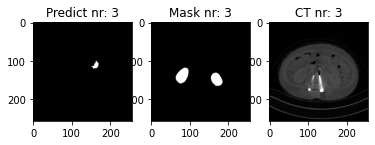

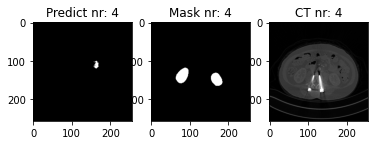

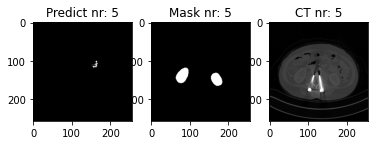

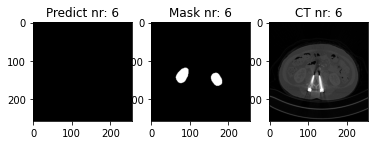

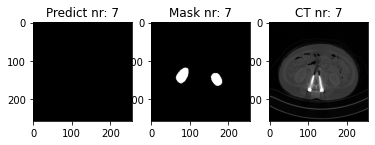

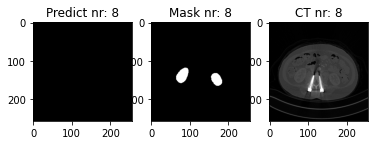

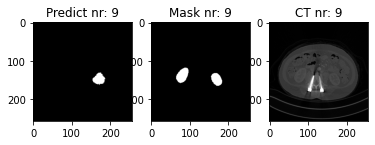

In [100]:
for indeks in range(0,10,1):
  #odczytanie przypuszczenia
  raw_prob_mask = predict[indeks]
  reshaped_prob_mask = np.squeeze(raw_prob_mask)
  prob_mask = (reshaped_prob_mask > 0.5).astype(np.uint8)
  prob_masks.append(prob_mask)
  #odczytanie prawidłowej maski
  raw_real_mask = next(kidney_generator_test)
  real_mask = np.squeeze(raw_real_mask)
  real_masks.append(real_mask)
  #odczytywanie CT
  raw_CT = next(volume_generator_test)
  CT = np.squeeze(raw_CT)
  #wizualizacja

  plt.figure()
  plt.subplot(1,3,1)
  plt.imshow(prob_mask,cmap='gray')
  plt.title('Predict nr: {:d}'.format(indeks))
  plt.subplot(1,3,2)
  plt.imshow(real_mask,cmap='gray')
  plt.title('Mask nr: {:d}'.format(indeks))
  plt.subplot(1,3,3)
  plt.imshow(CT,cmap='gray')
  plt.title('CT nr: {:d}'.format(indeks))
'''

  plt.figure()
  plt.subplot(1,3,1)
  plt.imshow(prob_mask,cmap='gray')
  plt.axis('off')
  plt.title('Dopasowana maska')
  plt.subplot(1,3,2)
  plt.imshow(real_mask,cmap='gray')
  plt.title('Prawidłowa maska')
  plt.axis('off')
  plt.subplot(1,3,3)
  plt.imshow(CT,cmap='gray')
  plt.title('CT')
  plt.axis('off')
'''

# ewaluacja


Text(0, 0.5, 'Liczba obrazów')

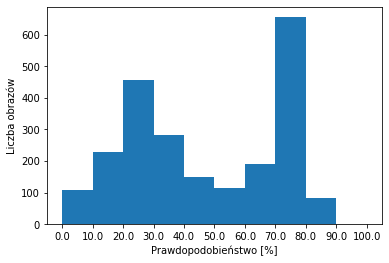

In [22]:
max_probabilities = []
min_probabilities = []

for indeks in range(0,2271,1):
  max_probabilities.append(np.max(predict[indeks]))
  min_probabilities.append(np.min(predict[indeks]))

num_bins = np.linspace(0, 1.1, 11, endpoint=False)
percentage = np.linspace(0, 110, 11, endpoint=False)
plt.hist(max_probabilities, num_bins)
plt.xticks(num_bins, percentage)
plt.xlabel("Prawdopodobieństwo [%]")
plt.ylabel("Liczba obrazów")

In [31]:
def getSimilarityOfMasks(prob_mask, real_mask):
  flatten_prob_mask = np.ravel(prob_mask)
  flatten_real_mask = np.ravel(real_mask)

  part1 = flatten_prob_mask[flatten_real_mask == 1]
  part2 = part1[part1 == 1]

  number_of_same_elements = np.sum(part2)
  number_of_real_elements = np.sum(flatten_real_mask[flatten_real_mask == 1])

  good_fit = 100*number_of_same_elements/number_of_real_elements
  if good_fit >= 70:
    result = "good"
  elif good_fit > 30 and good_fit < 70:
    result = "average"
  else:
    result = "bad"
  return result 

In [32]:
bad = 0
average = 0
good = 0
for indeks in range(0,2271,1):
  result = getSimilarityOfMasks(prob_masks[indeks], real_masks[indeks])
  if result is "bad":
    bad = bad + 1
  elif result is "average":
    average = average + 1
  else:
    good = good + 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'Liczba obrazów')

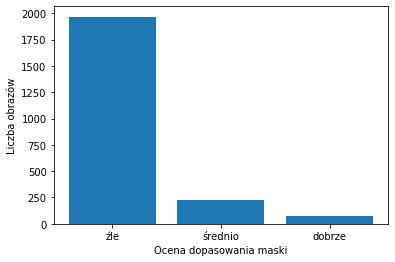

In [34]:
x = range(3)
x_labels = ['źle', 'średnio', 'dobrze']

y = [bad, average, good]

plt.bar(x, y)
plt.xticks(x, x_labels)
plt.xlabel("Ocena dopasowania maski")
plt.ylabel("Liczba obrazów")